### Dataset
https://finance.yahoo.com/quote/GOOG/history?period1=1092873600&period2=1605830400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

For more about RNN https://en.wikipedia.org/wiki/Recurrent_neural_network

**RNN(Recurrent Neural Network):**
A recurrent neural network can be thought of as multiple copies of the same networks, each passing a message to successor.

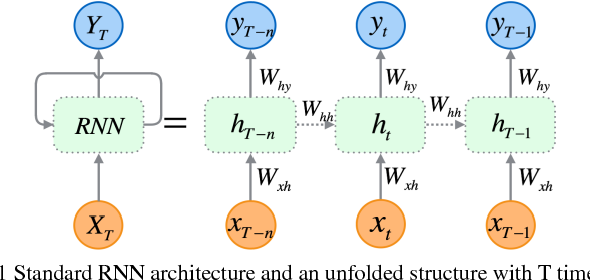



Different types of Recurrent Neural Networks.
- one to one: Image Classification
- one to many: Sequence output, image captioning takes an image and outputs a sentence of words.
- many to one: Sequence input( sentiment analysis where a given sentence is classified as expressing +ve or -ve sentiment
- many to many: Sequence imput and sequence output( machine Translation: an RNN reads a sentence in english and then outputs a sentence in French)
Synced sequence input and output video classification where we wish to label ach frame of the video

1-60 to 61
2-61 to pridicting 62
3-62 to 63
to 10 days

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('GOOG.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4089,2020-11-13,1757.630005,1781.040039,1744.550049,1777.020020,1777.020020,1499900
4090,2020-11-16,1771.699951,1799.069946,1767.689941,1781.380005,1781.380005,1246800
4091,2020-11-17,1776.939941,1785.000000,1767.000000,1770.150024,1770.150024,1147100
4092,2020-11-18,1765.229980,1773.469971,1746.140015,1746.780029,1746.780029,1173500
4093,2020-11-19,1738.380005,1769.589966,1737.005005,1763.920044,1763.920044,1247900


In [3]:
data_training = data[data['Date']<'2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3864,2019-12-24,1348.500000,1350.260010,1342.780029,1343.560059,1343.560059,347500
3865,2019-12-26,1346.170044,1361.327026,1344.469971,1360.400024,1360.400024,667500
3866,2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
3867,2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900


In [4]:
data_test = data[data['Date']>='2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
3870,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3871,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3872,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
3873,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000
...,...,...,...,...,...,...,...
4089,2020-11-13,1757.630005,1781.040039,1744.550049,1777.020020,1777.020020,1499900
4090,2020-11-16,1771.699951,1799.069946,1767.689941,1781.380005,1781.380005,1246800
4091,2020-11-17,1776.939941,1785.000000,1767.000000,1770.150024,1770.150024,1147100
4092,2020-11-18,1765.229980,1773.469971,1746.140015,1746.780029,1746.780029,1173500


In [5]:
training_data = data_training.drop(['Date', 'Adj Close'], axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [6]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[3.07080191e-04, 8.79291979e-04, 0.00000000e+00, 1.25356905e-04,
        5.43577404e-01],
       [6.89986513e-04, 2.78189186e-03, 1.73314228e-03, 3.15285500e-03,
        2.77885613e-01],
       [4.38255570e-03, 4.44951014e-03, 4.99709621e-03, 3.56690484e-03,
        2.22150736e-01],
       ...,
       [9.99726026e-01, 9.99642423e-01, 9.97425041e-01, 9.92923311e-01,
        1.24858240e-02],
       [9.89839738e-01, 9.90869803e-01, 9.85707361e-01, 9.80912804e-01,
        1.26372774e-02],
       [9.74702051e-01, 9.79457057e-01, 9.81925328e-01, 9.81583871e-01,
        1.15577171e-02]])

In [7]:
X_train = []
y_train = []

In [8]:
training_data.shape[0]

3869

In [9]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train.shape, y_train.shape

((3809, 60, 5), (3809,))

#### Building LSTM

In [73]:
import tensorflow
print(tensorflow.__version__)

2.3.1


In [92]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [97]:
regressor = Sequential()

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 100, activation = 'relu'))
regressor.add(Dropout(0.4))

regressor.add(Dense(units = 1))

In [98]:
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 60, 50)            11200     
_________________________________________________________________
dropout_20 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_21 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_22 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 100)              

In [99]:
regressor.compile(optimizer = 'adam', loss ='mean_squared_error')

In [100]:
history = regressor.fit(X_train, y_train, epochs = 56, batch_size = 32)

Epoch 1/56
120/120 [==============================] - 17s 142ms/step - loss: 0.0170
Epoch 2/56
120/120 [==============================] - 17s 142ms/step - loss: 0.0043
Epoch 3/56
120/120 [==============================] - 17s 146ms/step - loss: 0.0043
Epoch 4/56
120/120 [==============================] - 16s 136ms/step - loss: 0.0031
Epoch 5/56
120/120 [==============================] - 16s 131ms/step - loss: 0.0033
Epoch 6/56
120/120 [==============================] - 16s 130ms/step - loss: 0.0035
Epoch 7/56
120/120 [==============================] - 17s 143ms/step - loss: 0.0028
Epoch 8/56
120/120 [==============================] - 17s 142ms/step - loss: 0.0026
Epoch 9/56
120/120 [==============================] - 16s 132ms/step - loss: 0.0027
Epoch 10/56
120/120 [==============================] - 17s 140ms/step - loss: 0.0022
Epoch 11/56
120/120 [==============================] - 16s 134ms/step - loss: 0.0023
Epoch 12/56
120/120 [==============================] - 16s 131ms/step - lo

#### Prepare test dataset

In [101]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
3870,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3871,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3872,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
3873,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000


In [102]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3809,2019-10-07,1204.400024,1218.203979,1203.750000,1207.680054,1207.680054,842900
3810,2019-10-08,1197.589966,1206.079956,1189.010010,1189.130005,1189.130005,1039300
3811,2019-10-09,1199.349976,1208.349976,1197.630005,1202.310059,1202.310059,867700
3812,2019-10-10,1198.579956,1215.000000,1197.339966,1208.670044,1208.670044,846600
3813,2019-10-11,1222.209961,1228.390015,1213.739990,1215.449951,1215.449951,1272700
3814,2019-10-14,1212.339966,1226.329956,1211.760010,1217.140015,1217.140015,867500
3815,2019-10-15,1220.400024,1247.329956,1220.400024,1243.010010,1243.010010,1381700
3816,2019-10-16,1241.170044,1254.739990,1238.449951,1243.640015,1243.640015,1094600
3817,2019-10-17,1250.930054,1263.324951,1249.939941,1253.069946,1253.069946,952400
3818,2019-10-18,1253.459961,1258.890015,1241.079956,1245.489990,1245.489990,1352800


In [103]:
past_60_days = data_training.tail(60)

In [104]:
df = past_60_days.append(data_test, ignore_index = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07,1204.400024,1218.203979,1203.750000,1207.680054,1207.680054,842900
1,2019-10-08,1197.589966,1206.079956,1189.010010,1189.130005,1189.130005,1039300
2,2019-10-09,1199.349976,1208.349976,1197.630005,1202.310059,1202.310059,867700
3,2019-10-10,1198.579956,1215.000000,1197.339966,1208.670044,1208.670044,846600
4,2019-10-11,1222.209961,1228.390015,1213.739990,1215.449951,1215.449951,1272700
...,...,...,...,...,...,...,...
280,2020-11-13,1757.630005,1781.040039,1744.550049,1777.020020,1777.020020,1499900
281,2020-11-16,1771.699951,1799.069946,1767.689941,1781.380005,1781.380005,1246800
282,2020-11-17,1776.939941,1785.000000,1767.000000,1770.150024,1770.150024,1147100
283,2020-11-18,1765.229980,1773.469971,1746.140015,1746.780029,1746.780029,1173500


In [105]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1204.400024,1218.203979,1203.750000,1207.680054,842900
1,1197.589966,1206.079956,1189.010010,1189.130005,1039300
2,1199.349976,1208.349976,1197.630005,1202.310059,867700
3,1198.579956,1215.000000,1197.339966,1208.670044,846600
4,1222.209961,1228.390015,1213.739990,1215.449951,1272700


In [106]:
inputs = scaler.transform(df)
inputs

array([[0.87902801, 0.88831029, 0.88587359, 0.88295285, 0.01011709],
       [0.87384509, 0.87908573, 0.87457744, 0.8688071 , 0.01249673],
       [0.87518458, 0.88081287, 0.88118346, 0.87885784, 0.01041758],
       ...,
       [1.31477077, 1.31955689, 1.31752604, 1.31187664, 0.01380286],
       [1.30585868, 1.31078427, 1.30153978, 1.29405533, 0.01412273],
       [1.28542398, 1.30783217, 1.29453907, 1.30712583, 0.01502418]])

In [107]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [108]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((225, 60, 5), (225,))

In [109]:
y_pred = regressor.predict(X_test)

In [110]:
scaler.scale_

array([7.61069658e-04, 7.60849739e-04, 7.66360329e-04, 7.62571888e-04,
       1.21162775e-08])

In [111]:
scale = 1/7.61069658e-04
scale

1313.940175499678

In [112]:
y_pred = y_pred*scale
y_test = y_test*scale

In [113]:
y_pred

array([[1106.6428 ],
       [1106.9927 ],
       [1107.5139 ],
       [1108.5815 ],
       [1110.6562 ],
       [1113.7196 ],
       [1117.8135 ],
       [1122.7354 ],
       [1128.2202 ],
       [1133.8491 ],
       [1139.3192 ],
       [1144.6705 ],
       [1150.1572 ],
       [1155.9536 ],
       [1162.1102 ],
       [1168.3926 ],
       [1174.2842 ],
       [1178.7534 ],
       [1181.7712 ],
       [1183.9794 ],
       [1185.5974 ],
       [1186.6425 ],
       [1187.5964 ],
       [1188.233  ],
       [1188.6029 ],
       [1189.2089 ],
       [1190.3959 ],
       [1192.4346 ],
       [1195.5565 ],
       [1199.5934 ],
       [1204.1407 ],
       [1208.8158 ],
       [1213.3956 ],
       [1217.8448 ],
       [1222.003  ],
       [1225.3617 ],
       [1226.7485 ],
       [1225.7085 ],
       [1222.578  ],
       [1217.1505 ],
       [1209.1815 ],
       [1200.0061 ],
       [1190.8783 ],
       [1182.4092 ],
       [1174.2472 ],
       [1165.4895 ],
       [1154.9235 ],
       [1143.

### Visualization

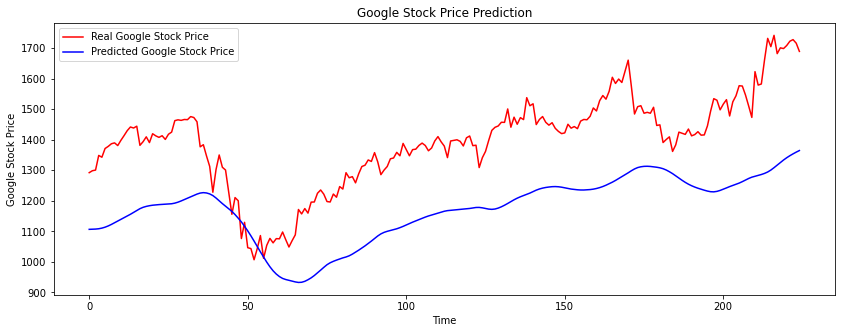

In [114]:
# Visualizing the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()